In [2]:
!pip install TA-Lib


# %%
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# อ่านข้อมูลจาก Excel แทน yfinance
file_path = 'Agriculture and food industry_5y_data.xlsx'  # 🔁 เปลี่ยนชื่อไฟล์ตามของจริง
df = pd.read_excel(file_path)

# ตรวจสอบว่าคอลัมน์ 'Date' อยู่ใน index หรือเปล่า
if df.index.name == 'Date':
    df = df.reset_index()

# กรองคอลัมน์ให้มีเฉพาะที่ต้องการ (ถ้ามีมากกว่านี้ในไฟล์)
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# แปลงคอลัมน์ Date ให้อยู่ในรูป datetime (ถ้ายังไม่ได้แปลง)
df['Date'] = pd.to_datetime(df['Date'])

# ดูตัวอย่างข้อมูล
print(df.head())


# %%
import pandas as pd
import talib as ta

# 1. อ่านข้อมูลจากทุกชีตในไฟล์ Excel
file_path = 'Agriculture and food industry_5y_data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

period = 14
processed_dict = {}

def rsi_signal(rsi):
    if rsi >= 70:
        return "SELL"
    elif rsi <= 30:
        return "BUY"
    else:
        return ""

def signal_to_binary(signal):
    if signal == "BUY":
        return 1
    else:
        return 0

for sheet_name, df in sheets_dict.items():
    if df.index.name == 'Date':
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
    df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
    df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
    df['RSI'] = ta.RSI(df['Close'], timeperiod=period)

    macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = macdsignal
    df['MACD_hist'] = macdhist

    df['Change'] = df['Close'].diff()
    df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
    df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

    df['Avg Gain'] = df['Gain'].rolling(window=period).mean()
    df['Avg Loss'] = df['Loss'].rolling(window=period).mean()

    df['RS'] = df.apply(lambda row: row['Avg Gain'] / row['Avg Loss'] if row['Avg Loss'] != 0 else 100, axis=1)

    df['RSI Signal'] = df['RSI'].apply(rsi_signal)

    # เพิ่มคอลัมน์ status แบบ binary target
    df['status'] = df['RSI Signal'].apply(signal_to_binary)

    processed_dict[sheet_name] = df

    # แสดงค่า unique ของ status ในแต่ละชีต
    print(f"Sheet: {sheet_name} — unique values in status: {df['status'].unique()}")

# Export ทุกชีตกลับไปยัง Excel
output_path = 'หุ้น_processed.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for sheet, df in processed_dict.items():
        df.to_excel(writer, sheet_name=sheet, index=False)





        Date      Open      High       Low     Close     Volume
0 2022-11-01  6.584078  7.500848  6.084021  7.417505  932827900
1 2022-11-02  7.084134  7.459176  6.417392  6.542406  410476300
2 2022-11-03  6.542406  6.917449  6.417392  6.834106  145654900
3 2022-11-04  6.792434  7.000791  6.500735  6.542406  119765500
4 2022-11-07  6.625749  6.625749  6.125693  6.167364   88102200
Sheet: AAI.bk — unique values in status: [0 1]
Sheet: APURE.bk — unique values in status: [0 1]
Sheet: ASIAN.bk — unique values in status: [0 1]
Sheet: BR.bk — unique values in status: [0 1]
Sheet: BRR.bk — unique values in status: [0 1]
Sheet: BTG.bk — unique values in status: [0 1]
Sheet: CBG.bk — unique values in status: [0 1]
Sheet: CFRESH.bk — unique values in status: [0 1]
Sheet: CH.bk — unique values in status: [0 1]
Sheet: CHAO.bk — unique values in status: [0 1]
Sheet: CHOTI.bk — unique values in status: [0 1]
Sheet: CM.bk — unique values in status: [0 1]
Sheet: COCOCO.bk — unique values in status: [

In [3]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูลจาก Excel
file_path = 'หุ้น_processed.xlsx'
df = pd.read_excel(file_path)


In [4]:
df

,Date,Open,High,Low,Close,Volume,EMA25,EMA75,EMA200,RSI,...,MACD_signal,MACD_hist,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI Signal,status
0,2022-11-01,6.584078,7.500848,6.084021,7.417505,932827900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0000,0.000000,NaN,NaN,NaN,NaN,0
1,2022-11-02,7.084134,7.459176,6.417392,6.542406,410476300,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.875099,0.0000,0.875099,NaN,NaN,NaN,NaN,0
2,2022-11-03,6.542406,6.917449,6.417392,6.834106,145654900,NaN,NaN,NaN,NaN,...,NaN,NaN,0.291700,0.2917,0.000000,NaN,NaN,NaN,NaN,0
3,2022-11-04,6.792434,7.000791,6.500735,6.542406,119765500,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.291700,0.0000,0.291700,NaN,NaN,NaN,NaN,0
4,2022-11-07,6.625749,6.625749,6.125693,6.167364,88102200,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.375042,0.0000,0.375042,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2025-06-09,4.300000,4.340000,4.280000,4.300000,726100,4.280726,4.522532,4.821014,50.760276,...,0.004278,0.020801,0.000000,0.0000,0.000000,0.038571,0.031429,1.227274,NaN,0
632,2025-06-10,4.300000,4.420000,4.280000,4.420000,2126200,4.291440,4.519833,4.817024,55.760447,...,0.009867,0.022355,0.120000,0.1200,0.000000,0.047143,0.030000,1.571429,NaN,0
633,2025-06-11,4.440000,4.620000,4.400000,4.480000,6072400,4.305944,4.518785,4.813671,58.054028,...,0.016341,0.025896,0.060000,0.0600,0.000000,0.047143,0.030000,1.571429,NaN,0
634,2025-06-12,4.500000,4.500000,4.340000,4.340000,2845900,4.308564,4.514080,4.808957,51.362694,...,0.020759,0.017675,-0.140000,0.0000,0.140000,0.047143,0.040000,1.178572,NaN,0


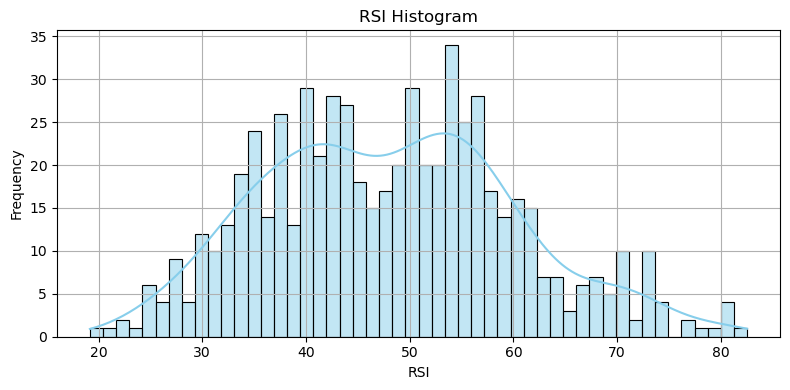

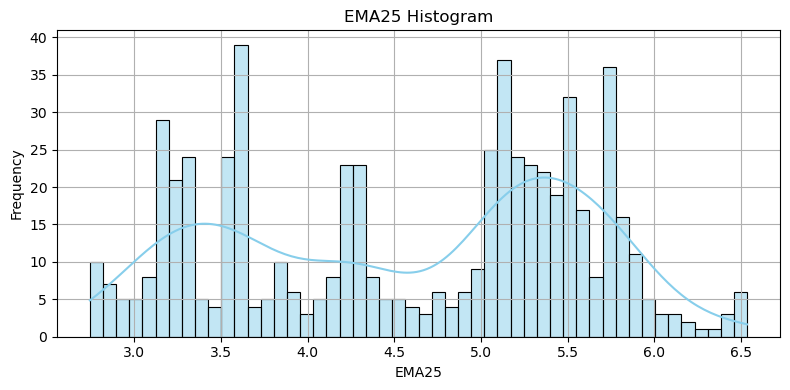

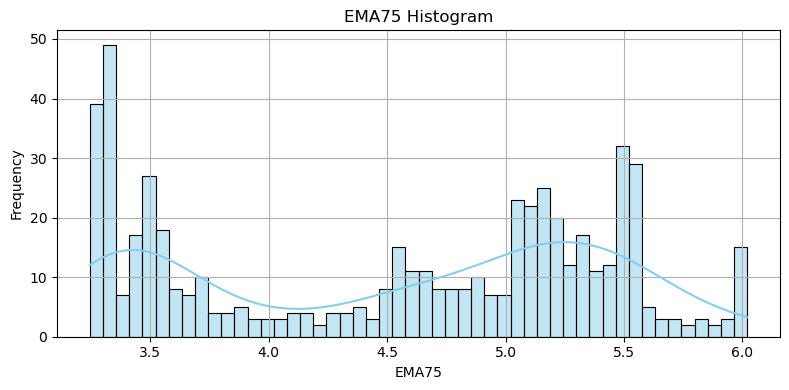

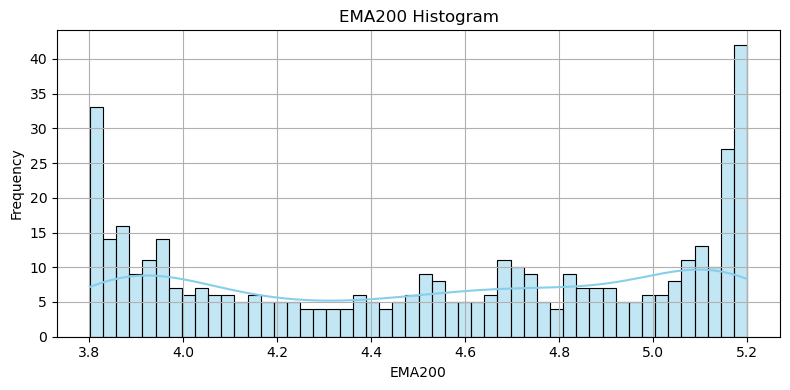

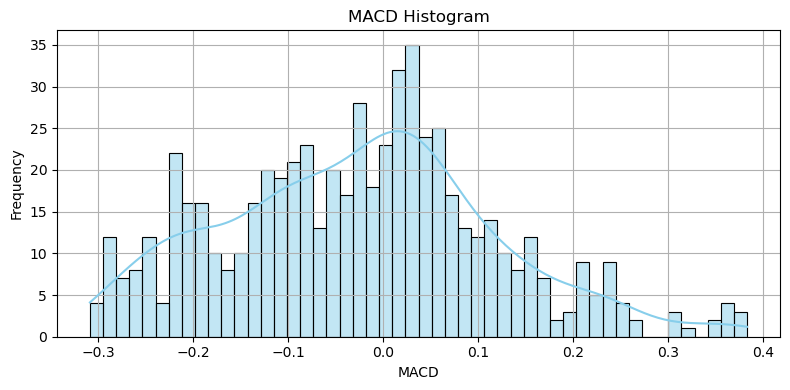

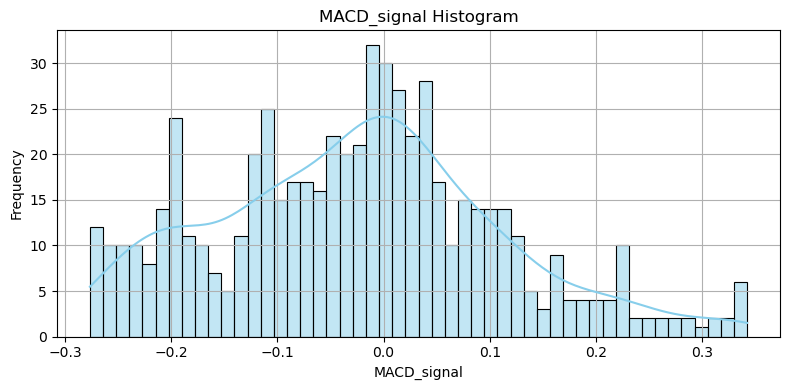

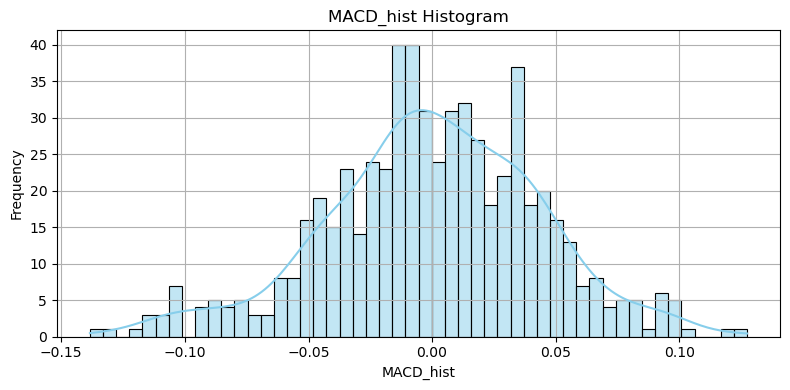

In [5]:

# สร้าง Histogram สำหรับแต่ละอินดิเคเตอร์
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

for indicator in indicators:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[indicator].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f'{indicator} Histogram')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

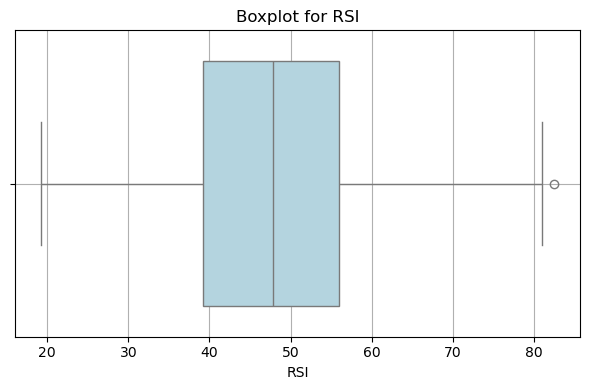

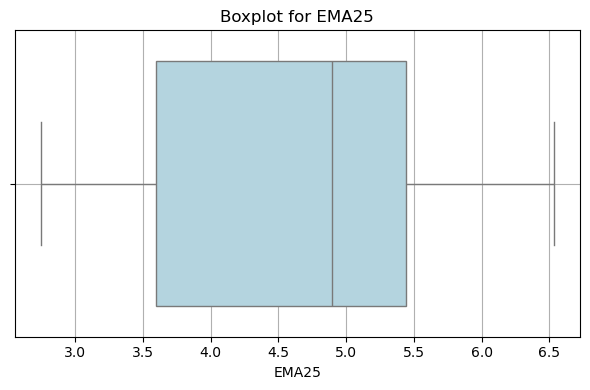

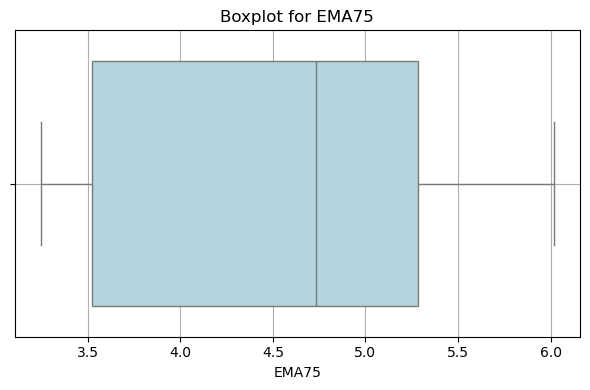

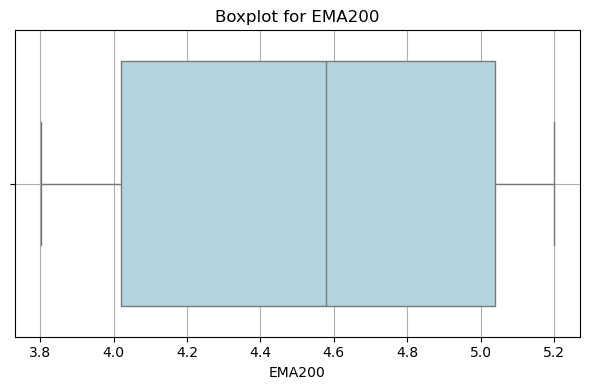

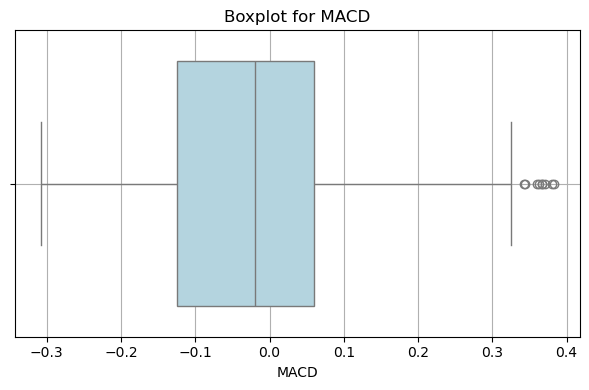

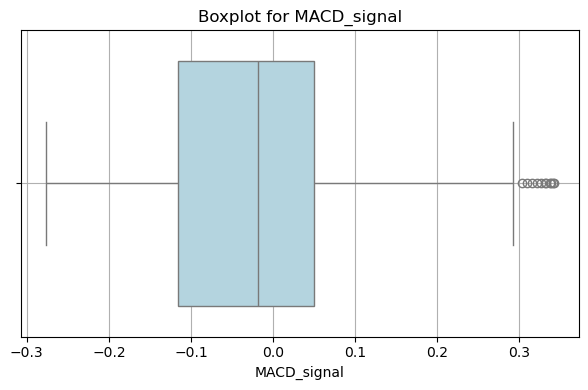

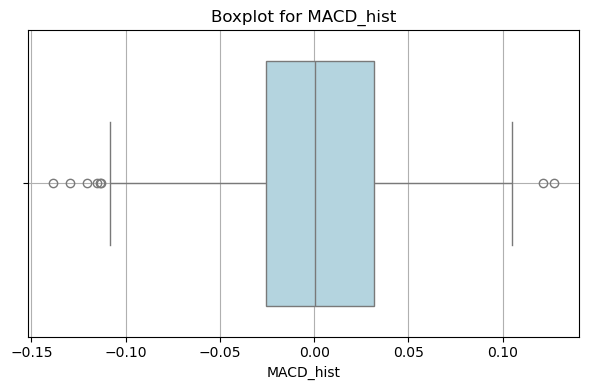

In [6]:
# เลือก Indicator ที่ต้องการตรวจสอบ
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

# สร้าง Boxplot สำหรับแต่ละ Indicator
for indicator in indicators:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[indicator], color='lightblue')
    plt.title(f'Boxplot for {indicator}')
    plt.xlabel(indicator)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_rsi = detect_outliers(df['RSI'])
print("RSI Outliers:")
print(outliers_rsi)


RSI Outliers:
372    82.540237
Name: RSI, dtype: float64


In [8]:
# แสดงข้อมูลแถวที่ RSI เป็น outlier
df.loc[372]


Date           2024-05-14 00:00:00
Open                      5.322107
High                      5.458571
Low                       5.276619
Close                     5.458571
Volume                    15039900
EMA25                      4.48098
EMA75                     4.011627
EMA200                    3.936459
RSI                      82.540237
MACD                      0.344003
MACD_signal                0.24596
MACD_hist                 0.098044
Change                    0.136464
Gain                      0.136464
Loss                           0.0
Avg Gain                  0.125001
Avg Loss                  0.016246
RS                        7.694402
RSI Signal                    SELL
status                           0
Name: 372, dtype: object

In [ ]:
import pandas as pd

# สมมติ df คือ DataFrame ของคุณ

indicators = ['RSI', 'MACD', 'EMA25']  # ใส่ชื่อ Indicator ที่ต้องการตรวจสอบ

outlier_summary = pd.DataFrame()  # ตารางสรุป

for ind in indicators:
    Q1 = df[ind].quantile(0.25)
    Q3 = df[ind].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # เลือกข้อมูลที่เป็น outlier ของ Indicator นี้
    outliers = df[(df[ind] < lower_bound) | (df[ind] > upper_bound)].copy()
    outliers['Indicator'] = ind  # เพิ่มคอลัมน์ชื่อ Indicator เพื่อบอกว่าอันนี้คือ outlier ของตัวไหน
    
    # เลือกคอลัมน์สำคัญที่จะเก็บไว้ (แก้ตามความเหมาะสม)
    cols = ['Date', 'Open', 'High', 'Low', 'Close', ind, 'Indicator']
    outliers = outliers[cols]
    
    # รวมข้อมูล outlier ทุก indicator เข้าด้วยกัน
    outlier_summary = pd.concat([outlier_summary, outliers])

# แสดงผลตารางสรุป outlier ของทุก Indicator
print(outlier_summary)
